In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/databaitapcanhan/spam_email.csv
/kaggle/input/databaitapcanhan1/letters_CG.csv


In [2]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.datasets import load_breast_cancer
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from sklearn.preprocessing import LabelEncoder

In [3]:
# Load libraries 
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [4]:
df = pd.read_csv("/kaggle/input/databaitapcanhan/spam_email.csv")
df.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        4601 non-null   float64
 1   address     4601 non-null   float64
 2   all         4601 non-null   float64
 3   3d          4601 non-null   float64
 4   our         4601 non-null   float64
 5   over        4601 non-null   float64
 6   remove      4601 non-null   float64
 7   internet    4601 non-null   float64
 8   order       4601 non-null   float64
 9   mail        4601 non-null   float64
 10  receive     4601 non-null   float64
 11  will        4601 non-null   float64
 12  people      4601 non-null   float64
 13  report      4601 non-null   float64
 14  addresses   4601 non-null   float64
 15  free        4601 non-null   float64
 16  business    4601 non-null   float64
 17  email       4601 non-null   float64
 18  you         4601 non-null   float64
 19  credit      4601 non-null  

In [6]:
X = df[['make', 'address', 'all','3d','our','over','remove','internet', 'order', 'mail', 'receive', 
        'will', 'people', 'report', 'addresses', 'free', 'business', 'email', 'you', 'credit', 'your', 
          'font', '000','money','hp','hpl','george', '650','lab','labs', 'telnet','857','data', '415',
        '85', 'technology','1999','parts','pm','direct','cs','meeting','original', 'project','re','edu',
        'table','conference','semicol','paren','bracket','bang','dollar','pound','cap_avg','cap_long','cap_total']]

X.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.0,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.0,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20


In [7]:
y = df['Class']

y.head()

0     ham
1     ham
2     ham
3    spam
4    spam
Name: Class, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [10]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
# n_estinmators the number of models to iteratively train
abc = AdaBoostClassifier(n_estimators=30, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)

In [11]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.9283128167994207


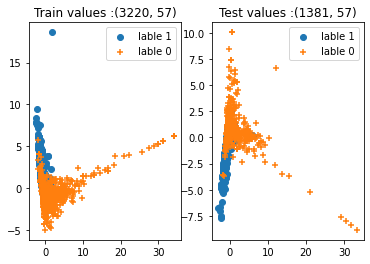

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
fig, (plttrain, plttest) = plt.subplots(1, 2)
datavl1=pca.fit_transform(X_train_scaled)
g11=datavl1[(y_train==1)]
g12=datavl1[(y_train==0)]
plttrain.set_title('Train values :'+ str(X_train_scaled.shape))
plttrain.scatter(g11[:,0],g11[:,1],marker='o')
plttrain.scatter(g12[:,0],g12[:,1],marker='+')
plttrain.legend(['lable 1','lable 0'])
datavl2=pca.fit_transform(X_test_scaled)
g21=datavl2[(y_test==1)]
g22=datavl2[(y_test==0)]
plttest.set_title('Test values :'+str(X_test_scaled.shape))
plttest.scatter(g21[:,0],g21[:,1],marker='o')
plttest.scatter(g22[:,0],g22[:,1],marker='+')
plttest.legend(['lable 1','lable 0'])

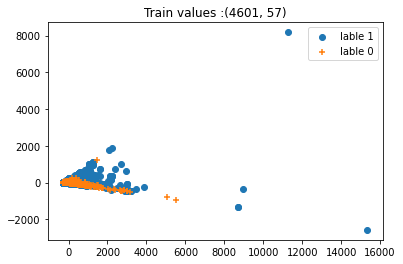

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca= PCA(n_components=2)
# fig, (plttrain, plttest) = plt.subplots(1, 2)
datavlx=pca.fit_transform(X)
gx1=datavlx[(y==1)]
gx2=datavlx[(y==0)]
plt.title('Train values :'+ str(X.shape))
plt.scatter(gx1[:,0],gx1[:,1],marker='o')
plt.scatter(gx2[:,0],gx2[:,1],marker='+')
plt.legend(['lable 1','lable 0'])

In [14]:
class RatingModel:
    def __init__(self, y_, y_Pr):
      self.y_=y_
      self.y_Pr=y_Pr
      self.TN=np.size(y_Pr[(y_Pr==-1)&(y_==y_Pr)])
      self.FN=np.size(y_Pr[(y_Pr==-1)&(y_!=y_Pr)])
      self.TP=np.size(y_Pr[(y_Pr==1)&(y_==y_Pr)])
      self.FP=np.size(y_Pr[(y_Pr==1)&(y_!=y_Pr)])
      self.y_[self.y_==0]=-1
      self.y_Pr[self.y_Pr==0]=-1
    def __rep__():
        return ""
    def accur_Error(self, y_, y_Pr):
        rs=(self.TP+self.TN)/(y_.size)
        return [rs,(1-rs)]
    def sensitivity(self):
        P=np.size(self.y_[self.y_==1])
        return (self.TP)/(P)
    def specificity(self):
        N=np.size(self.y_[self.y_==-1])
        return (self.TN)/(N)
    def precision(self):
        rs=self.TP+self.FP
        return (self.TP)/(rs)
    def recall(self):
        rs=self.TP+self.FN
        return (self.TP)/(rs)
    def rating(self):
        return [self.accur_Error(self.y_, self.y_Pr), self.sensitivity(), self.specificity(), self.precision(), self.recall()]
class DecisionStump:
    def __init__(self, T=100):
        self.T = T
        pass

    def fit(self, X: np.ndarray, y: np.ndarray, sample_weight: np.ndarray):
        T = self.T
        W=sample_weight
        nrow, ncol = X.shape
        assert nrow == y.size

        bestn = 0
        bestd = 1
        bestp = 0
        minerr = W.sum()
        for i in range(ncol):
            err, d, p = self._optimize(X[:, i], y, W, T)
            if err < minerr:
                minerr = err
                bestn = i
                bestd = d
                bestp = p
        
        self.features = ncol
        self.bestn = bestn
        self.bestd = bestd
        self.bestp = bestp

        return self

    def _optimize(self, X, y, W, T):
        X = X.flatten()
        min_x, max_x = X.min(), X.max()
        len_x = max_x - min_x
        
        bestd = 1
        bestp = min_x
        minerr = W.sum()

        if len_x > 0.0:
            for p in np.arange(min_x, max_x, len_x/T):
                for d in [-1, 1]:
                    gy = np.ones((y.size))
                    gy[X*d < p*d] = -1
                    err = np.sum((gy != y)*W)
                    if err < minerr:
                        minerr = err
                        bestd = d
                        bestp = p

        return minerr, bestd, bestp

    def predict(self, test_set : np.ndarray):
        nrow, ncol = test_set.shape

        assert ncol == self.features

        icol = test_set[:, self.bestn]
        h = np.ones((nrow))
        h[icol*self.bestd < self.bestp*self.bestd] = -1
        return h
class AdaBoost:
    def __init__(self , T, hmodel = DecisionStump()):
        self.T=T
        self.hmodel=hmodel
    def fit(self, X: np.ndarray, y_: np.ndarray, verbose=False):
      n = X.shape[0]
      T = self.T
      y=y_
      y[y==0]=-1
    # init numpy arrays
      self.D = np.zeros(shape=(T, n))
      self.h = np.zeros(shape=T, dtype=object)
      self.alpha = np.zeros(shape=T)
      self.errors = np.zeros(shape=T)
      self.ratting = np.zeros(shape=(T,2))

      # initialize weights uniformly
      self.D[0] = np.ones(shape=n) / n

      for t in range(T):
          # fit  weak learner
          D_ = self.D[t]
          h_ = DecisionStump(60)
          h_ = h_.fit(X, y, D_)

          # calculate error and stump weight from weak learner prediction
          Pr_ = h_.predict(X)
          error_ = D_[(Pr_ != y)].sum()# / n
          alpha_ = np.log((1 - error_) / error_) / 2

          # update sample weights
          D_new = (
              D_ * np.exp(-alpha_ * y * Pr_)
          )
          
          D_new /= D_new.sum()

          # If not final iteration, update sample weights for t+1
          if t+1 < T:
              self.D[t+1] = D_new

          # save results of iteration
          self.h[t] = h_
          self.alpha[t] = alpha_
          self.errors[t] = error_
          if t>0:
            Pr_temp=self.predictmodul(X,t)
            modelra=RatingModel(y, Pr_temp)
            self.ratting[t,:]=modelra.accur_Error(y, Pr_temp)
          if verbose: print('Training {0}-th weak classifier: accuracy={1}, error={2}'.format (t, self.ratting[t,0], self.ratting[t,1]))
      return self
    def predict(self, X):
        Pr_ = np.array([h_.predict(X) for h_ in self.h])
        return np.sign(np.dot(self.alpha, Pr_))
    def predictmodul(self, X, i):
        h_temp=self.h[:i]
        alpha_temp=self.alpha[:i]
        Pr_ = np.array([h_.predict(X) for h_ in h_temp])
        return np.sign(np.dot(alpha_temp, Pr_))

In [15]:
model=AdaBoost(30)
model=model.fit(X_train_scaled, y_train,  True )
Pr=model.predict( X_test_scaled)
Pr[(Pr==0)]=-1

Training 0-th weak classifier: accuracy=0.0, error=0.0
Training 1-th weak classifier: accuracy=0.7732919254658385, error=0.22670807453416153
Training 2-th weak classifier: accuracy=0.7732919254658385, error=0.22670807453416153
Training 3-th weak classifier: accuracy=0.8229813664596274, error=0.17701863354037262
Training 4-th weak classifier: accuracy=0.8298136645962733, error=0.17018633540372674
Training 5-th weak classifier: accuracy=0.8618012422360248, error=0.13819875776397517
Training 6-th weak classifier: accuracy=0.8618012422360248, error=0.13819875776397517
Training 7-th weak classifier: accuracy=0.886335403726708, error=0.11366459627329195
Training 8-th weak classifier: accuracy=0.8835403726708074, error=0.11645962732919257
Training 9-th weak classifier: accuracy=0.8745341614906832, error=0.1254658385093168
Training 10-th weak classifier: accuracy=0.8940993788819875, error=0.10590062111801246
Training 11-th weak classifier: accuracy=0.8857142857142857, error=0.11428571428571432

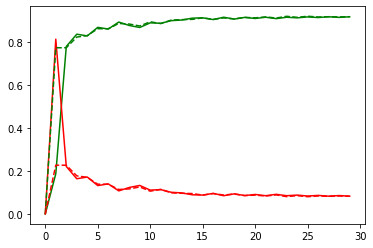

In [16]:
ra_Xtest = np.zeros(shape=(model.T,2))
for i in range(1,model.T):
  Pr_i=model.predictmodul(X_test_scaled,i)
  modelra=RatingModel(y_test, Pr_i)
  ra_Xtest[i,:]=modelra.accur_Error(y_test, Pr_i)
ra_Xtrain = np.zeros(shape=(model.T,2))
for i in range(1,model.T):
  Pr_i=model.predictmodul(X_train_scaled,i)
  modelra=RatingModel(y_train, Pr_i)
  ra_Xtrain[i,:]=modelra.accur_Error(y_train, Pr_i)
iter=range(model.T)
plt.plot(iter,ra_Xtest[:,0],'g-', label='Test accuracy')
plt.plot(iter,ra_Xtest[:,1],'r-', label='Test error')
plt.plot(iter,ra_Xtrain[:,0],'g--', label='Train accuracy')
plt.plot(iter,ra_Xtrain[:,1],'r--', label='Train error')

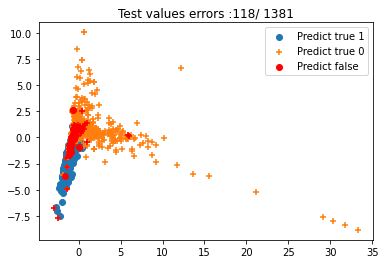

In [17]:
sumerror=0;
y_new=y_test
y_new[y_new==0]=-1
sumerror=np.size(y_new[Pr!=y_new])
gT1=datavl2[(Pr==1)]
gT0=datavl2[(Pr==-1)]
gF1=datavl2[(y_new!=Pr)&(Pr==1)]
gF0=datavl2[(y_new!=Pr)&(Pr==-1)]
plt.title('Test values errors :'+str(sumerror)+'/ '+str(X_test_scaled.shape[0]))
plt.scatter(gT1[:,0],gT1[:,1], marker='o')
plt.scatter(gT0[:,0],gT0[:,1], marker='+')
plt.scatter(gF1[:,0],gF1[:,1], c="red", marker='o')
plt.scatter(gF0[:,0],gF0[:,1], c="red", marker='+')
plt.legend(['Predict true 1', 'Predict true 0', 'Predict false'])

In [18]:
df = pd.read_csv("/kaggle/input/databaitapcanhan1/letters_CG.csv")
df.head()

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   1509 non-null   object
 1   x-box   1509 non-null   int64 
 2   y-box   1509 non-null   int64 
 3   width   1509 non-null   int64 
 4   high    1509 non-null   int64 
 5   onpix   1509 non-null   int64 
 6   x-bar   1509 non-null   int64 
 7   y-bar   1509 non-null   int64 
 8   x2bar   1509 non-null   int64 
 9   y2bar   1509 non-null   int64 
 10  xybar   1509 non-null   int64 
 11  x2ybr   1509 non-null   int64 
 12  xy2br   1509 non-null   int64 
 13  x-ege   1509 non-null   int64 
 14  xegvy   1509 non-null   int64 
 15  y-ege   1509 non-null   int64 
 16  yegvx   1509 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 200.5+ KB


In [20]:
X = df[['x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar','x2ybr',
       'xy2br', 'x-ege', 'xegvy','y-ege','yegvx']]

X.head()

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [21]:
y = df['Class']

y.head()

0    C
1    C
2    G
3    C
4    G
Name: Class, dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [23]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [24]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
# n_estinmators the number of models to iteratively train
abc = AdaBoostClassifier(n_estimators=60, learning_rate=1, random_state=0)
# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model1.predict(X_test)

In [25]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.9514348785871964


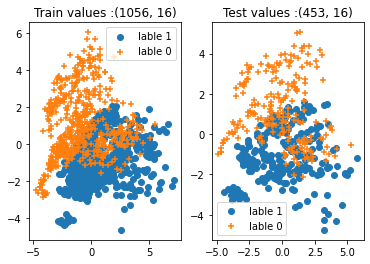

In [26]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
fig, (plttrain, plttest) = plt.subplots(1, 2)
datavl1=pca.fit_transform(X_train_scaled)
g11=datavl1[(y_train==1)]
g12=datavl1[(y_train==0)]
plttrain.set_title('Train values :'+ str(X_train_scaled.shape))
plttrain.scatter(g11[:,0],g11[:,1],marker='o')
plttrain.scatter(g12[:,0],g12[:,1],marker='+')
plttrain.legend(['lable 1','lable 0'])
datavl2=pca.fit_transform(X_test_scaled)
g21=datavl2[(y_test==1)]
g22=datavl2[(y_test==0)]
plttest.set_title('Test values :'+str(X_test_scaled.shape))
plttest.scatter(g21[:,0],g21[:,1],marker='o')
plttest.scatter(g22[:,0],g22[:,1],marker='+')
plttest.legend(['lable 1','lable 0'])

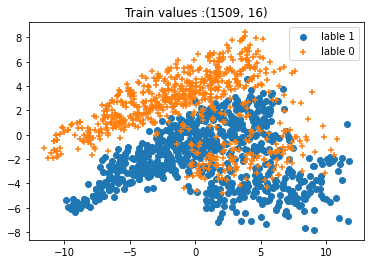

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca= PCA(n_components=2)
# fig, (plttrain, plttest) = plt.subplots(1, 2)
datavlx=pca.fit_transform(X)
gx1=datavlx[(y==1)]
gx2=datavlx[(y==0)]
plt.title('Train values :'+ str(X.shape))
plt.scatter(gx1[:,0],gx1[:,1],marker='o')
plt.scatter(gx2[:,0],gx2[:,1],marker='+')
plt.legend(['lable 1','lable 0'])

In [28]:
model=AdaBoost(60)
model=model.fit(X_train_scaled, y_train,  True )
Pr=model.predict( X_test_scaled)
Pr[(Pr==0)]=-1

Training 0-th weak classifier: accuracy=0.0, error=0.0
Training 1-th weak classifier: accuracy=0.7916666666666666, error=0.20833333333333337
Training 2-th weak classifier: accuracy=0.7916666666666666, error=0.20833333333333337
Training 3-th weak classifier: accuracy=0.8172348484848485, error=0.1827651515151515
Training 4-th weak classifier: accuracy=0.8371212121212122, error=0.16287878787878785
Training 5-th weak classifier: accuracy=0.8503787878787878, error=0.14962121212121215
Training 6-th weak classifier: accuracy=0.8768939393939394, error=0.12310606060606055
Training 7-th weak classifier: accuracy=0.8873106060606061, error=0.11268939393939392
Training 8-th weak classifier: accuracy=0.9053030303030303, error=0.09469696969696972
Training 9-th weak classifier: accuracy=0.9166666666666666, error=0.08333333333333337
Training 10-th weak classifier: accuracy=0.9071969696969697, error=0.09280303030303028
Training 11-th weak classifier: accuracy=0.9176136363636364, error=0.0823863636363636

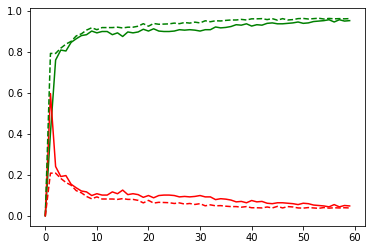

In [29]:
ra_Xtest = np.zeros(shape=(model.T,2))
for i in range(1,model.T):
  Pr_i=model.predictmodul(X_test_scaled,i)
  modelra=RatingModel(y_test, Pr_i)
  ra_Xtest[i,:]=modelra.accur_Error(y_test, Pr_i)
ra_Xtrain = np.zeros(shape=(model.T,2))
for i in range(1,model.T):
  Pr_i=model.predictmodul(X_train_scaled,i)
  modelra=RatingModel(y_train, Pr_i)
  ra_Xtrain[i,:]=modelra.accur_Error(y_train, Pr_i)
iter=range(model.T)
plt.plot(iter,ra_Xtest[:,0],'g-', label='Test accuracy')
plt.plot(iter,ra_Xtest[:,1],'r-', label='Test error')
plt.plot(iter,ra_Xtrain[:,0],'g--', label='Train accuracy')
plt.plot(iter,ra_Xtrain[:,1],'r--', label='Train error')

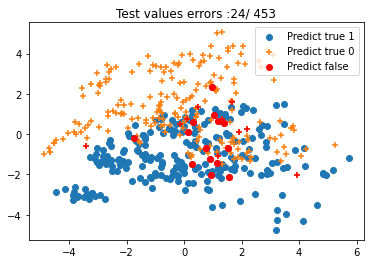

In [30]:
sumerror=0;
y_new=y_test
y_new[y_new==0]=-1
sumerror=np.size(y_new[Pr!=y_new])
gT1=datavl2[(Pr==1)]
gT0=datavl2[(Pr==-1)]
gF1=datavl2[(y_new!=Pr)&(Pr==1)]
gF0=datavl2[(y_new!=Pr)&(Pr==-1)]
plt.title('Test values errors :'+str(sumerror)+'/ '+str(X_test_scaled.shape[0]))
plt.scatter(gT1[:,0],gT1[:,1], marker='o')
plt.scatter(gT0[:,0],gT0[:,1], marker='+')
plt.scatter(gF1[:,0],gF1[:,1], c="red", marker='o')
plt.scatter(gF0[:,0],gF0[:,1], c="red", marker='+')
plt.legend(['Predict true 1', 'Predict true 0', 'Predict false'])